https://x.com/shivambhadani_/status/1793239846661800252
https://x.com/shivambhadani_/status/1793563834550223278
https://x.com/mdancho84/status/1793757518130204770

In [129]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/297.1 MB 85.3 kB/s eta 0:57:25^C
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/297.1 MB 85.3 kB/s eta 0:57:25
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [1]:
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np

import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
import mplfinance as mpf

2024-05-25 20:24:59.800568: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-25 20:24:59.859182: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-25 20:24:59.859233: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-25 20:24:59.859274: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-25 20:24:59.868645: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-25 20:25:01.488601: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT

In [2]:
data = yf.download(tickers="MSFT", period="60d", interval="5m")

[*********************100%%**********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-03-01 09:30:00-05:00,411.820007,413.849915,411.619995,413.417114,413.417114,817688
2024-03-01 09:35:00-05:00,413.480011,414.160004,413.165009,414.024994,414.024994,255326
2024-03-01 09:40:00-05:00,414.028412,414.968201,413.860107,414.670013,414.670013,319303
2024-03-01 09:45:00-05:00,413.859985,414.619995,412.890015,412.954987,412.954987,223994
2024-03-01 09:50:00-05:00,413.000000,413.135010,411.750000,412.239990,412.239990,231346
...,...,...,...,...,...,...
2024-05-24 15:35:00-04:00,430.070099,430.440308,430.000000,430.239990,430.239990,102611
2024-05-24 15:40:00-04:00,430.220001,430.220001,429.755005,429.820007,429.820007,107429
2024-05-24 15:45:00-04:00,429.834991,430.329987,429.750000,429.750000,429.750000,224700


In [4]:
#msft = yf.Ticker("MSFT")
#(msft.info)

In [5]:
#Read the csv file
#df = pd.read_csv('TATAMOTORS.csv')
title = 'AAPL'

In [6]:
df = data.copy()
df.index = [datetime.strptime(date[:-6],'%Y-%m-%d %H:%M:%S') for date in df.index.astype(str)]
df

,Open,High,Low,Close,Adj Close,Volume
2024-03-01 09:30:00,411.820007,413.849915,411.619995,413.417114,413.417114,817688
2024-03-01 09:35:00,413.480011,414.160004,413.165009,414.024994,414.024994,255326
2024-03-01 09:40:00,414.028412,414.968201,413.860107,414.670013,414.670013,319303
2024-03-01 09:45:00,413.859985,414.619995,412.890015,412.954987,412.954987,223994
2024-03-01 09:50:00,413.000000,413.135010,411.750000,412.239990,412.239990,231346
...,...,...,...,...,...,...
2024-05-24 15:35:00,430.070099,430.440308,430.000000,430.239990,430.239990,102611
2024-05-24 15:40:00,430.220001,430.220001,429.755005,429.820007,429.820007,107429
2024-05-24 15:45:00,429.834991,430.329987,429.750000,429.750000,429.750000,224700
2024-05-24 15:50:00,429.799988,430.000000,429.559998,429.875000,429.875000,245256


In [124]:
def fin_plot(df, title,style):
    styles = ['default','classic','mike','yahoo','nightclouds','sas','starsandstripes','bank','bigcharts','blueskies','brasil','checkers','charles',
          'ibd','kenan','mike','nightclouds','sas','starsandstripes','yahoo']

    fig, axlist = mpf.plot(df, type='candle', style=style, volume=True, title=title,
                           ylabel='Price', returnfig=True)
    
    # Customizing x-label
    axlist[0].set_xlabel('Time')
    
    # Customizing title, x-label, and y-label for the volume subplot
    #axlist[2].set_title('', fontsize=12)
    axlist[2].set_xlabel('Time')
    axlist[2].set_ylabel('Volume')

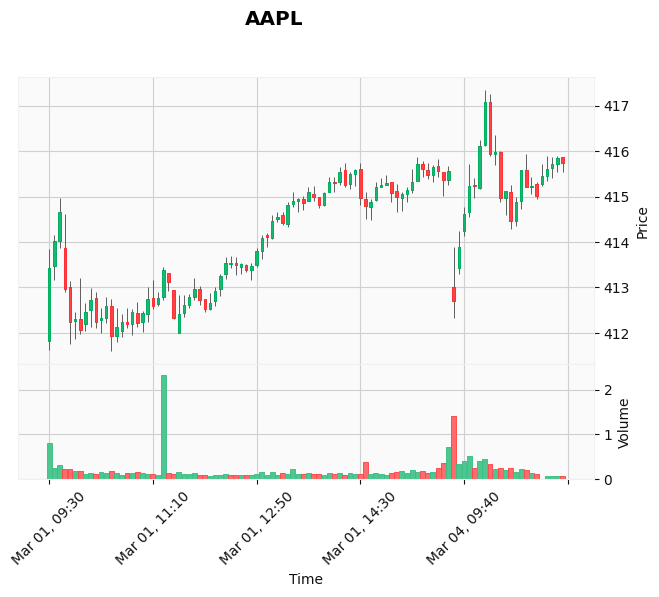

In [125]:
fin_plot(df[:100], 'AAPL','yahoo')

In [9]:
"""
Finding special points:
    1.Morning Star/Shooting strart
    2.Support
    3.Resistance
    4.Exponential Moving Average
    5.RSI indicator
    6.Breaking news sentiment
    7.
"""

'\nFinding special points:\n    1.Morning Star/Shooting strart\n    2.Support\n    3.Resistance\n    4.Exponential Moving Average\n    5.RSI indicator\n    6.Breaking news sentiment\n    7.\n'

In [10]:
"""
It is based on the assumption that more recent values of a variable contribute more to the formation of the next value 
than precedent values.
"""
def calculate_ema(data, window_length):
    if window_length <= 0:
        raise ValueError("Window length must be a positive integer.")
    
    ema = [None] * len(data)
    alpha = 2 / (window_length + 1)
    
    for i in range(len(data)):
        if i < window_length:
            ema[i] = sum(data[:window_length]) / window_length
        else:
            ema[i] = alpha * data[i] + (1 - alpha) * ema[i - 1]
    return ema


def calculate_rsi(data, window_length):
  if window_length <= 0:
    raise ValueError("Window length must be a positive integer.")

  rsi = [None] * len(data)
  avg_gain = 0
  avg_loss = 0

  for i in range(len(data)):
    if i < window_length:
      # Skip RSI calculation for the initial window
      continue

    close_diff = data[i] - data[i - 1]

    if close_diff > 0:
      # Positive difference (gain)
      avg_gain = (avg_gain * (window_length - 1) + close_diff) / window_length
    else:
      # Negative difference (loss)
      avg_loss = abs(avg_loss * (window_length - 1) + close_diff) / window_length

    # Avoid division by zero for initial periods with no losses
    if avg_loss == 0:
      avg_loss = 0.000001

    rsi[i] = 100 - (100 / (1 + avg_gain / avg_loss))

  return rsi

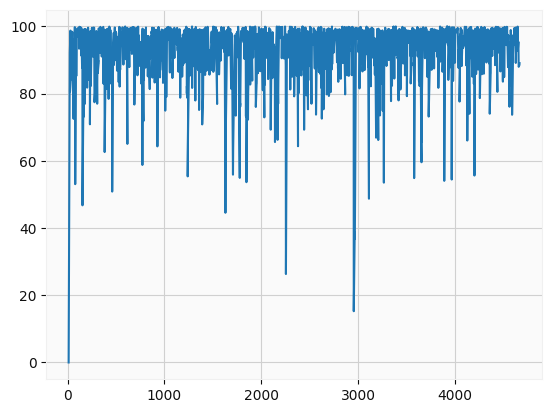

In [11]:
plt.plot(calculate_rsi(df['High'], 10))

In [12]:
df['EMA'] = calculate_ema(df['Close'], 13)
df['RSI'] = calculate_rsi(df['Close'], 13)

In [13]:
df.to_csv('apple5min.csv')

In [14]:
#Separate dates for future plotting
#train_dates = pd.to_datetime(df['Datetime'])
#train_dates.tail(16) #Check last few dates. 

In [16]:
#New dataframe with only training data - 5 columns
df_for_training = df.iloc[13:,:].astype(float)

scaler = StandardScaler()
df_for_training_scaled = scaler.fit_transform(df_for_training)

In [48]:
from sklearn.model_selection import train_test_split

In [59]:
#Empty lists to be populated using formatted training data
trainX_ = []
trainY_ = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 20    # i.e- 2 weeks, Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
for i in range(0,df_for_training_scaled.shape[0]-n_past):
    trainX_.append(df_for_training_scaled[i:i+n_past, 0:df_for_training.shape[1]])
    trainY_.append(df_for_training_scaled[i+n_past, :])

trainX_, trainY_ = np.array(trainX_), np.array(trainY_)
trainX_.shape

(4637, 20, 8)

In [63]:
trainX,testX,trainY,testY = train_test_split(trainX_,trainY_, test_size = 0.2)

testX.shape

(928, 20, 8)

In [57]:
trainY.shape

(3709, 8)

In [111]:
model = Sequential()
model.add(LSTM(55, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(25, activation='relu', kernel_regularizer=regularizers.l2(0.01), return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 20, 55)            14080     
                                                                 
 dropout_10 (Dropout)        (None, 20, 55)            0         
                                                                 
 lstm_17 (LSTM)              (None, 25)                8100      
                                                                 
 dropout_11 (Dropout)        (None, 25)                0         
                                                                 
 dense_5 (Dense)             (None, 8)                 208       
                                                                 
Total params: 22388 (87.45 KB)
Trainable params: 22388 (87.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [110]:
# fit the model
history = model.fit(trainX_, trainY_, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
116/116 [==============================] - 3s 26ms/step - loss: 0.2323 - val_loss: 0.0975
Epoch 2/100
116/116 [==============================] - 3s 26ms/step - loss: 0.2299 - val_loss: 0.0932
Epoch 3/100
116/116 [==============================] - 3s 24ms/step - loss: 0.2318 - val_loss: 0.0936
Epoch 4/100
116/116 [==============================] - 3s 24ms/step - loss: 0.2328 - val_loss: 0.0943
Epoch 5/100
116/116 [==============================] - 3s 26ms/step - loss: 0.2293 - val_loss: 0.1035
Epoch 6/100
116/116 [==============================] - 3s 24ms/step - loss: 0.2287 - val_loss: 0.0982
Epoch 7/100
116/116 [==============================] - 3s 24ms/step - loss: 0.2240 - val_loss: 0.1005
Epoch 8/100
116/116 [==============================] - 3s 24ms/step - loss: 0.2294 - val_loss: 0.1044
Epoch 9/100
116/116 [==============================] - 3s 25ms/step - loss: 0.2284 - val_loss: 0.0970
Epoch 10/100
116/116 [==============================] - 3s 26ms/step - loss: 0.228

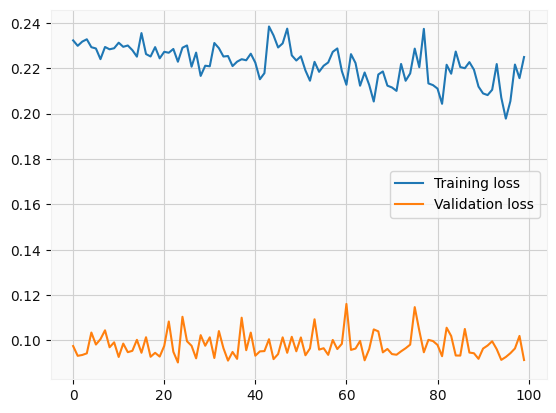

In [112]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [113]:
#Performance on test data
test_pred = model.predict(testX)

29/29 [==============================] - 1s 9ms/step


In [114]:
prediction = scaler.inverse_transform(test_pred)
df_pred = pd.DataFrame(prediction, columns=df.columns)
Datetime = df.index
df_l50 = df_pred.iloc[-50:]
df_l50['Datetime'] = Datetime[-50:]
df_l50.set_index('Datetime', inplace=True)

In [115]:
df_l50

,Open,High,Low,Close,Adj Close,Volume,EMA,RSI
Datetime,,,,,,,,
2024-05-24 11:50:00,416.415527,416.266113,416.883759,418.366699,414.757843,188858.640625,415.673462,94.924019
2024-05-24 11:55:00,413.977020,415.610992,418.311554,416.249664,413.121124,170584.281250,414.909027,92.057549
2024-05-24 12:00:00,414.233307,415.925720,415.376221,417.158752,415.309570,169031.062500,415.970062,93.587746
2024-05-24 12:05:00,417.341125,416.783905,417.741455,420.073883,414.538666,184389.125000,415.607727,95.768524
2024-05-24 12:10:00,414.375122,415.619171,418.401917,416.110962,413.309448,175813.343750,415.030640,92.368690
2024-05-24 12:15:00,415.382538,416.135437,415.737000,415.824951,415.296539,187940.656250,415.766266,93.682556
2024-05-24 12:20:00,414.200806,416.139557,417.778748,416.193756,414.419891,185402.078125,416.034271,92.602257
2024-05-24 12:25:00,415.168610,416.069092,415.817566,415.866302,415.244049,183496.734375,415.957306,93.540215
2024-05-24 12:30:00,416.435730,416.390350,416.177979,418.228455,414.849091,190198.656250,415.134552,94.887329


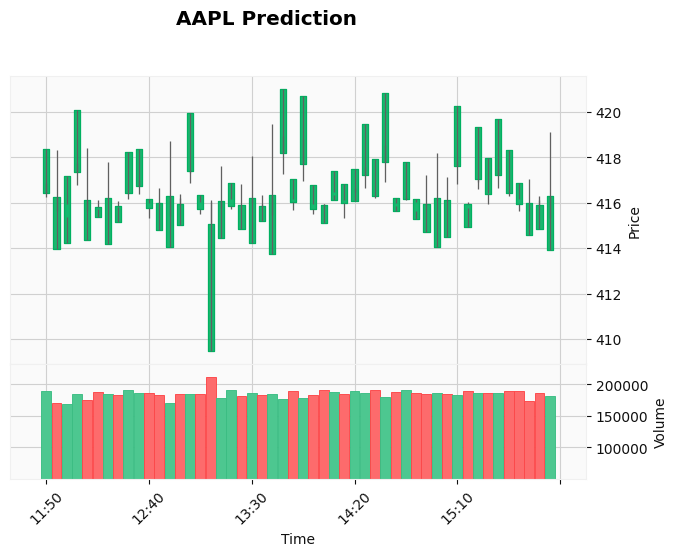

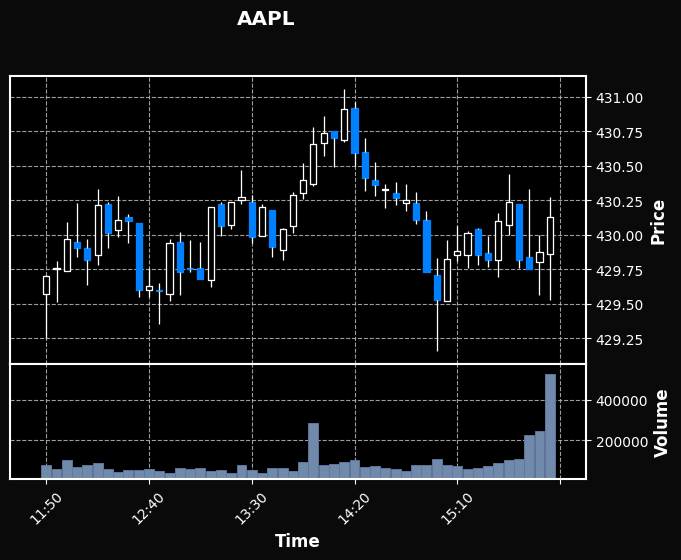

In [128]:
fin_plot(df_l50.iloc[:,0:6],"AAPL Prediction",'yahoo')
fin_plot(df[-50:],'AAPL','mike')

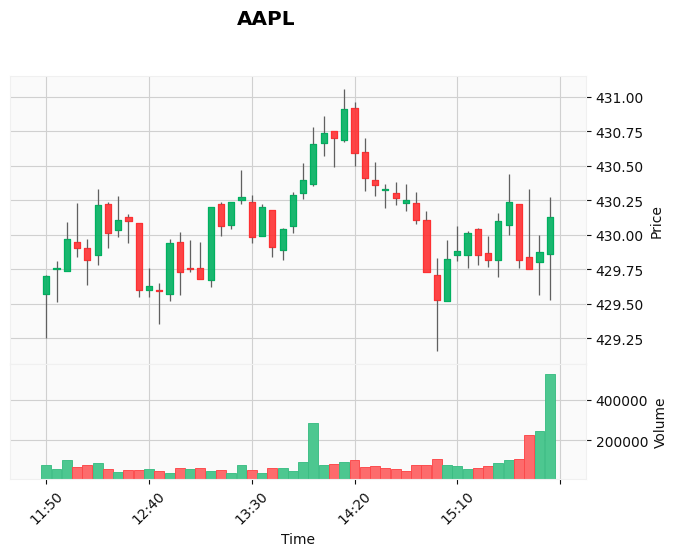

In [104]:
fin_plot(df[-50:],'AAPL')

In [63]:
model2 = Sequential()
# Bidirectional LSTM layer
model2.add(Bidirectional(LSTM(30, input_shape=(trainX.shape[1], trainX.shape[2]), kernel_regularizer=regularizers.l2(0.01), return_sequences=True)))
model2.add(Dropout(0.2))
model2.add(Dense(trainY.shape[1]))
model2.compile(optimizer='adam', loss='mse')
model2.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [52]:
trainX.shape

(4567, 20, 8)

In [53]:
# Assuming your training data is in X_train and target is in y_train
history2 = model2.fit(trainX, trainY, epochs=50, batch_size=32, validation_split=0.3, verbose=1)

Epoch 1/50


InvalidArgumentError: Graph execution error:

Detected at node mean_squared_error/SquaredDifference defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/imran/Desktop/python_ws/DS_Project/DCProject_env/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/imran/Desktop/python_ws/DS_Project/DCProject_env/lib/python3.11/site-packages/traitlets/config/application.py", line 1053, in launch_instance

  File "/home/imran/Desktop/python_ws/DS_Project/DCProject_env/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 737, in start

  File "/home/imran/Desktop/python_ws/DS_Project/DCProject_env/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/imran/Desktop/python_ws/DS_Project/DCProject_env/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 524, in dispatch_queue

  File "/home/imran/Desktop/python_ws/DS_Project/DCProject_env/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 513, in process_one

  File "/home/imran/Desktop/python_ws/DS_Project/DCProject_env/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 418, in dispatch_shell

  File "/home/imran/Desktop/python_ws/DS_Project/DCProject_env/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 758, in execute_request

  File "/home/imran/Desktop/python_ws/DS_Project/DCProject_env/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 426, in do_execute

  File "/home/imran/Desktop/python_ws/DS_Project/DCProject_env/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/imran/Desktop/python_ws/DS_Project/DCProject_env/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3046, in run_cell

  File "/home/imran/Desktop/python_ws/DS_Project/DCProject_env/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3101, in _run_cell

  File "/home/imran/Desktop/python_ws/DS_Project/DCProject_env/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/imran/Desktop/python_ws/DS_Project/DCProject_env/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3306, in run_cell_async

  File "/home/imran/Desktop/python_ws/DS_Project/DCProject_env/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3488, in run_ast_nodes

  File "/home/imran/Desktop/python_ws/DS_Project/DCProject_env/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3548, in run_code

  File "/tmp/ipykernel_4380/3145659076.py", line 2, in <module>

  File "/home/imran/Desktop/python_ws/DS_Project/DCProject_env/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/imran/Desktop/python_ws/DS_Project/DCProject_env/lib/python3.11/site-packages/keras/src/engine/training.py", line 1783, in fit

  File "/home/imran/Desktop/python_ws/DS_Project/DCProject_env/lib/python3.11/site-packages/keras/src/engine/training.py", line 1377, in train_function

  File "/home/imran/Desktop/python_ws/DS_Project/DCProject_env/lib/python3.11/site-packages/keras/src/engine/training.py", line 1360, in step_function

  File "/home/imran/Desktop/python_ws/DS_Project/DCProject_env/lib/python3.11/site-packages/keras/src/engine/training.py", line 1349, in run_step

  File "/home/imran/Desktop/python_ws/DS_Project/DCProject_env/lib/python3.11/site-packages/keras/src/engine/training.py", line 1127, in train_step

  File "/home/imran/Desktop/python_ws/DS_Project/DCProject_env/lib/python3.11/site-packages/keras/src/engine/training.py", line 1185, in compute_loss

  File "/home/imran/Desktop/python_ws/DS_Project/DCProject_env/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/home/imran/Desktop/python_ws/DS_Project/DCProject_env/lib/python3.11/site-packages/keras/src/losses.py", line 143, in __call__

  File "/home/imran/Desktop/python_ws/DS_Project/DCProject_env/lib/python3.11/site-packages/keras/src/losses.py", line 270, in call

  File "/home/imran/Desktop/python_ws/DS_Project/DCProject_env/lib/python3.11/site-packages/keras/src/losses.py", line 1706, in mean_squared_error

Incompatible shapes: [32,8] vs. [32,20,8]
	 [[{{node mean_squared_error/SquaredDifference}}]] [Op:__inference_train_function_193984]

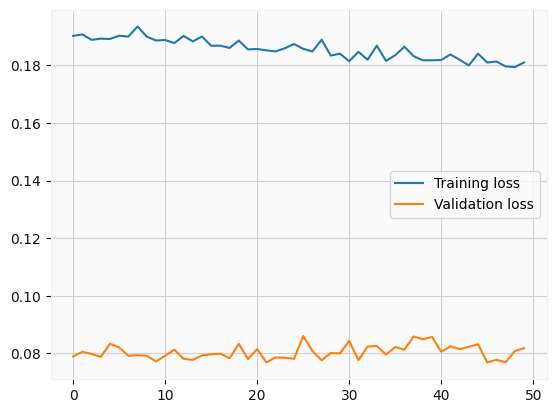

In [50]:
plt.plot(history2.history['loss'], label='Training loss')
plt.plot(history2.history['val_loss'], label='Validation loss')
plt.legend()

In [28]:
#
"""
from fbprophet import Prophet

# Sample data (replace with your actual data)

data = {
  'ds': pd.to_datetime(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01']),
  'y': [100, 120, 130, 110, 140]
}

# Create a Prophet model
model = Prophet()

# Add holidays (optional)
# holidays = pd.DataFrame({
#   'ds': pd.to_datetime(['2020-01-01']),  # New Year's Day
#   'holiday': ['New Year\'s Day']
# })
# model.add_holidays(holidays)

# Fit the model to the data
model.fit(df)

# Make future predictions
future = model.make_future_dataframe(periods=30)  # Predict for the next 30 days
forecast = model.predict(future)

# Print the forecast results
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
"""

"\nfrom fbprophet import Prophet\n\n# Sample data (replace with your actual data)\n\ndata = {\n  'ds': pd.to_datetime(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01']),\n  'y': [100, 120, 130, 110, 140]\n}\n\n# Create a Prophet model\nmodel = Prophet()\n\n# Add holidays (optional)\n# holidays = pd.DataFrame({\n#   'ds': pd.to_datetime(['2020-01-01']),  # New Year's Day\n#   'holiday': ['New Year's Day']\n# })\n# model.add_holidays(holidays)\n\n# Fit the model to the data\nmodel.fit(df)\n\n# Make future predictions\nfuture = model.make_future_dataframe(periods=30)  # Predict for the next 30 days\nforecast = model.predict(future)\n\n# Print the forecast results\nprint(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())\n"

In [ ]:
#Implementation of XGBoost


In [ ]:
#Implementation of Random forest

In [10]:
# Create lagged features (past values)
for i in range(1, 6):  # Include past 5 days
  X[f"Lag_{target_variable}_{i}"] = data[target_variable].shift(i)
X

,Open,High,Low,Volume,Lag_Close_1,Lag_Close_2,Lag_Close_3,Lag_Close_4,Lag_Close_5
Date,,,,,,,,,
2018-07-31,268.950012,270.450012,262.200012,10026055,NaN,NaN,NaN,NaN,NaN
2018-08-01,250.000000,268.000000,250.000000,53282545,264.100006,NaN,NaN,NaN,NaN
2018-08-02,263.450012,266.450012,258.700012,17421472,265.049988,264.100006,NaN,NaN,NaN
2018-08-03,262.149994,263.850006,257.600006,9041836,260.850006,265.049988,264.100006,NaN,NaN
2018-08-06,259.950012,261.799988,252.500000,11371744,258.450012,260.850006,265.049988,264.100006,NaN
...,...,...,...,...,...,...,...,...,...
2023-07-24,627.950012,634.450012,626.250000,12247844,625.750000,621.650024,620.599976,612.099976,618.500000
2023-07-25,636.000000,642.500000,633.349976,13988137,629.250000,625.750000,621.650024,620.599976,612.099976
2023-07-26,640.000000,665.400024,639.000000,31673714,639.450012,629.250000,625.750000,621.650024,620.599976


In [11]:

# Scale the features (optional but recommended)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, data[target_variable], test_size=0.2)

# Create the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)


In [16]:
X_train, y_train = X_train[10:], y_train[10:]
# Train the model
model.fit(X_train, y_train)


ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [13]:

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance (e.g., using Mean Squared Error)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Predict on new data (optional)
# Prepare features for the new data following the same steps as before (scaling, lags)
new_data = ...  # Your new data with features
new_data_scaled = scaler.transform(new_data)
predicted_price = model.predict(new_data_scaled)[0]
print(f"Predicted price for new data: {predicted_price}")


NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [44]:
#Predicting...
#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
us_bd

<CustomBusinessDay>

In [17]:
#Remember that we can only predict one day in future as our model needs 5 variables
#as inputs for prediction. We only have all 5 variables until the last day in our dataset.
n_past = 16
n_days_for_prediction=15  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


[Timestamp('2023-07-07 00:00:00'), Timestamp('2023-07-10 00:00:00'), Timestamp('2023-07-11 00:00:00'), Timestamp('2023-07-12 00:00:00'), Timestamp('2023-07-13 00:00:00'), Timestamp('2023-07-14 00:00:00'), Timestamp('2023-07-17 00:00:00'), Timestamp('2023-07-18 00:00:00'), Timestamp('2023-07-19 00:00:00'), Timestamp('2023-07-20 00:00:00'), Timestamp('2023-07-21 00:00:00'), Timestamp('2023-07-24 00:00:00'), Timestamp('2023-07-25 00:00:00'), Timestamp('2023-07-26 00:00:00'), Timestamp('2023-07-27 00:00:00')]
1/1 [==============================] - 0s 30ms/step


In [18]:
# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2020-5-1']

plt.plot(original['Date'], original['Open'])
plt.plot(df_forecast['Date'], df_forecast['Open'])

/tmp/ipykernel_4765/2170859564.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])
